# Little exercise: Linear Regression

*I. Set-up*

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns

#feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#machine learning model
from sklearn.linear_model import LinearRegression

#metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [2]:
#import dataset
df = sns.load_dataset('flights')
df.set_index('year')

,month,passengers
year,,
1949,Jan,112
1949,Feb,118
1949,Mar,132
1949,Apr,129
1949,May,121
...,...,...
1960,Aug,606
1960,Sep,508
1960,Oct,461


***

*II. Splitting the data*

In [3]:
#splitting the data
X = df
y = df['passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 101)

***

*III. Exploratory Data Analysis*

In [4]:
#applying the mean, grouped by year
df.groupby('year').mean()

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


In [5]:
#checking the std, grouped by year
df.groupby('year').std()

,passengers
year,
1949,13.720147
1950,19.070841
1951,18.438267
1952,22.966379
1953,28.466887
1954,34.924486
1955,42.140458
1956,47.861780
1957,57.890898


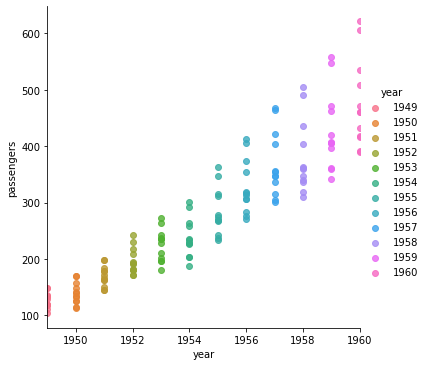

In [25]:
#explore visually, using a lmplot
sns.lmplot(data=df, x="year", y="passengers", hue='year', legend_out = True)

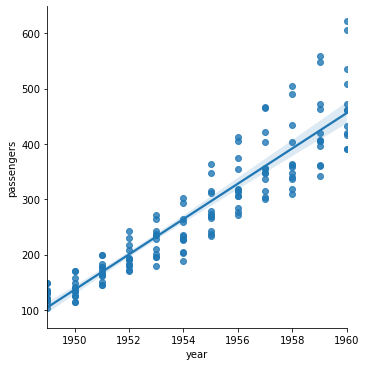

In [26]:
#explore visually, using a lmplot
sns.lmplot(data=df, x="year", y="passengers", legend_out = True)

***

*IV. Discover and replace missing values*

In [7]:
#Checking how many missed columns there are = NONE, no action required
df.isna().sum()

year          0
month         0
passengers    0
dtype: int64

***

*V. Removing y and months*

In [8]:
#Removing y
df.drop('passengers', axis = 1)

,year,month
0,1949,Jan
1,1949,Feb
2,1949,Mar
3,1949,Apr
4,1949,May
...,...,...
139,1960,Aug
140,1960,Sep
141,1960,Oct
142,1960,Nov


In [9]:
#Removing the months
df.drop('month', axis =1)

,year,passengers
0,1949,112
1,1949,118
2,1949,132
3,1949,129
4,1949,121
...,...,...
139,1960,606
140,1960,508
141,1960,461
142,1960,390


***

*VI. Feature Engineering: Transforming the numerical and categorical columns*

In [10]:
#Seperating the numerical and categorical columns 
numerical_columns = ['year']

In [11]:
#Defining the transformer and its parameters
column_transformer = ColumnTransformer([
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [12]:
#Fitting the columns to the transforming method
column_transformer.fit(X_train) # DO NOT FIT ON TEST DATA

ColumnTransformer(transformers=[('num_scaler', MinMaxScaler(), ['year'])])

In [13]:
#Transforming the columns
X_train = column_transformer.transform(X_train)
X_test = column_transformer.transform(X_test) 

***

*VII. Applying a linear regression model*

In [14]:
#applying a linear regression model 
m = LinearRegression()

In [15]:
#train the model 
m.fit(X_train, y_train)

LinearRegression()

In [16]:
#Calculating the score for the train data set
m.score(X_train, y_train) #> R^2 score

0.8593967763311114

In [17]:
#Calculating the score for the test data set
m.score(X_test, y_test)

0.7905923335076375

In [18]:
#Predicting 
y_pred = m.predict(X_test)

In [19]:
#Checking the coefficient and intercept
m.coef_, m.intercept_

(array([345.09181811]), 103.90454261721493)

***

*VIII. Checking out various loss function metrics (just for fun)*

In [20]:
#mse
mean_squared_error(y_test, y_pred)

2554.6619799171804

In [21]:
#rmse
mean_squared_error(y_test, y_pred, squared=False)

50.54366409271473

In [22]:
#rmsle
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.14495743322155744

In [23]:
#comparing the three loss function metrics
loss_func = pd.DataFrame({'Loss Function Metrics' : ['MSE', 'RMSE', 'RMSLE'],'Score' : ['2554.66', '50.54', '0.14']})
loss_func.set_index('Loss Function Metrics')

,Score
Loss Function Metrics,
MSE,2554.66
RMSE,50.54
RMSLE,0.14


***